**IS362**

BY Maureen Kilmade and Jake Kwok

For this particular part of the final the data is collected from http://www.football-data.co.uk.

**We begin**

Being A huge fan of the bundesliga i wanted to take a look at the stats to compare them with what Maureen had. I ended up loading the Bundesliga data in the form of a csv from my repo which i got from the footballda-data.co.uk website.

In [21]:
#import libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Germanleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Bundesliga.csv', 
                           usecols=[2,3,4,5,6,7,8,9])
Germanleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)
#add League column for when the 2 files are combined
Germanleague['League'] = 'BL1'
#Germanleague = Germanleague.set_index("HomeTeam")
Germanleague

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,BL1
1,Augsburg,Wolfsburg,0,2,A,0,1,A,BL1
2,Dortmund,Mainz,2,1,H,1,0,H,BL1
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,BL1
4,FC Koln,Darmstadt,2,0,H,1,0,H,BL1
...,...,...,...,...,...,...,...,...,...
274,RB Leipzig,Ingolstadt,0,0,D,0,0,D,BL1
275,Werder Bremen,Hertha,2,0,H,2,0,H,BL1
276,Wolfsburg,Bayern Munich,0,6,A,0,3,A,BL1
277,Augsburg,Hamburg,4,0,H,2,0,H,BL1


**In this data frame i opened up a csv from my repo with the english Premier League**

I did something similar to that of the BUndesliga and i took the same colomuns.

In [32]:
#add a League column so it's easy to sort later
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Englishleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Premierleague.csv', 
    usecols=[2,3,4,5,6,7,8,9])

Englishleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)
#Englishleague = Englishleague.set_index("HomeTeam")
Englishleague['League'] = 'EPL'
Englishleague

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Burnley,Swansea,0,1,A,0,0,D,EPL
1,Crystal Palace,West Brom,0,1,A,0,0,D,EPL
2,Everton,Tottenham,1,1,D,1,0,H,EPL
3,Hull,Leicester,2,1,H,1,0,H,EPL
4,Man City,Sunderland,2,1,H,1,0,H,EPL
...,...,...,...,...,...,...,...,...,...
339,Everton,Chelsea,0,3,A,0,0,D,EPL
340,Man United,Swansea,1,1,D,1,0,H,EPL
341,Middlesbrough,Man City,2,2,D,1,0,H,EPL
342,Tottenham,Arsenal,2,0,H,0,0,D,EPL


**Making Simple plot graphs**

I noticed while i was plotting the data i was only doing 1 league at a time which is hard if you are trying to compare 2 datasets. I had to think of another way to do this. The first thing i was doing was taking the two leagues and just plotting the FTHG points.

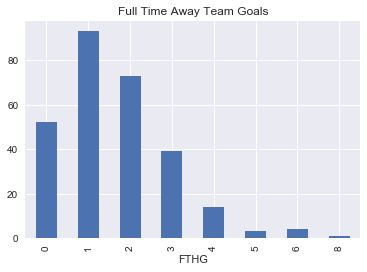

In [37]:
Germanleague.groupby("FTHG").size().plot(kind="bar", title="Full Time Away Team Goals")

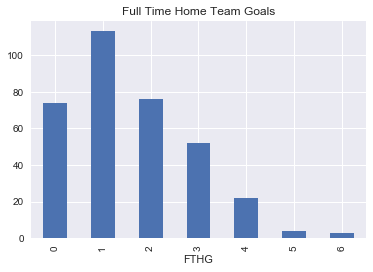

In [38]:
Englishleague.groupby("FTHG").size().plot(kind="bar",title="Full Time Home Team Goals")

**This is a data frame with both the German League and the English League with the values concatenated**

The purpose was to:

1) Display both leagues together

2) Easy to plot data using Bokeh charts


In [35]:
#put both leagues into the same chart
leagues = [Germanleague, Englishleague]
both = pd.concat(leagues)
both.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,BL1
1,Augsburg,Wolfsburg,0,2,A,0,1,A,BL1
2,Dortmund,Mainz,2,1,H,1,0,H,BL1
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,BL1
4,FC Koln,Darmstadt,2,0,H,1,0,H,BL1


In [36]:
from bokeh.charts import Scatter, output_file, show, Line, Bar, Histogram
from bokeh.plotting import figure, show, output_notebook

output_notebook()

p = Histogram(both, values='FTHG', color='League')
show(p, notebook_handle=True)

Loading BokehJS ...

In [27]:
from bokeh.charts import Scatter, output_file, show, Line, Bar, Histogram
from bokeh.plotting import figure, show, output_notebook

output_notebook()

p = Histogram(both, values='HTHG', color='League')
show(p, notebook_handle=True)

Loading BokehJS ...

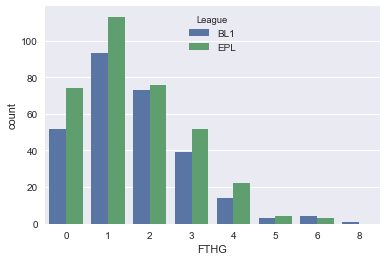

In [28]:
#Germanleague.groupby("FTHG").size().plot(kind="distplot",title="Full Time Home Team Goals")
sns.countplot(x='FTHG', data=both, hue='League')

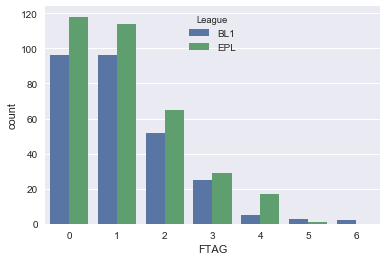

In [29]:
sns.countplot(x='FTAG', data=both, hue='League')

In [30]:
pd.merge(Germanleague, Englishleague, on=['FTHG','FTAG','FTR','HTHG','HTAG','HTR'], how='inner')

,HomeTeam_x,AwayTeam_x,FTHG,FTAG,FTR,...,HTR,League_x,HomeTeam_y,AwayTeam_y,League_y
0,Augsburg,Wolfsburg,0,2,A,...,A,BL1,Hull,Stoke,EPL
1,Augsburg,Wolfsburg,0,2,A,...,A,BL1,Southampton,Chelsea,EPL
2,Augsburg,Wolfsburg,0,2,A,...,A,BL1,West Brom,Man United,EPL
3,Augsburg,Wolfsburg,0,2,A,...,A,BL1,Bournemouth,Man City,EPL
4,Augsburg,Wolfsburg,0,2,A,...,A,BL1,Sunderland,Man City,EPL
...,...,...,...,...,...,...,...,...,...,...,...
2149,Mainz,RB Leipzig,2,3,A,...,D,BL1,Liverpool,Swansea,EPL
2150,Schalke 04,Wolfsburg,4,1,H,...,H,BL1,Crystal Palace,Stoke,EPL
2151,Bayern Munich,Mainz,2,2,D,...,A,BL1,Liverpool,West Ham,EPL
2152,Bayern Munich,Mainz,2,2,D,...,A,BL1,Arsenal,Man City,EPL


**In Conclusion:** THe English league appears to have better ratings than the bundesliga. By looking at the FTHG and FTAG  THE EPL have more goals overall compared to the Germans. However, i do disagree with maureen that the EPL is better because i feel that the Germans have more Swagger and they did win that world cup!